# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# imports - Pandas, data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#import wholesale_data

data = pd.read_csv('wholesale_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Step 1: Basic data exploration e.g. shape, nulls, data types

In [4]:
data.shape
# 440 rows of 8 columns / features

(440, 8)

In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.info()
# all integers and all non null, perhaps some outliers or 0 values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Initial impressions:
- Numerically, Channel and Region are completely distinct from Fresh, Milk etc the other later columns. If this is sales / wholesale data then this makes sense as channel and Region are probably encoded values that represent the names of different regions e.g. North, South, West... and Channels e.g. Online, in-store, retail partner etc.
- To evidence this, we can look at number of unique values for each column, it's very likely there's only around a maximum of 5-10 channels (online/instore/retail/events...????) or 10-20 regions (north/south/east/west/central/mountain/coast...????) but the number of sales of product categories would be much much higher than this
- Delicassen should be **Delicatessen** but it doesn't matter really

In [15]:
print(data['Channel'].value_counts()) # only two channels

print(data['Region'].value_counts()) # only three regions

print(data['Fresh'].value_counts()) # 433 different unique values for Fresh category

print(data['Grocery'].value_counts()) # 430 different unique values for Grocery category

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64
Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64
Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: count, Length: 430, dtype: int64


Next Steps:
- I'm fully convinced Region and Channel are label encoded variables whereas the other categories are the actual sales data
- for K Means Clustering I would therefore lean toward three (for region) or two (channel) means for modelling as a first run, before anything else is learned
- Box plots to find outliers
- Correlation Matrix to find any correlations

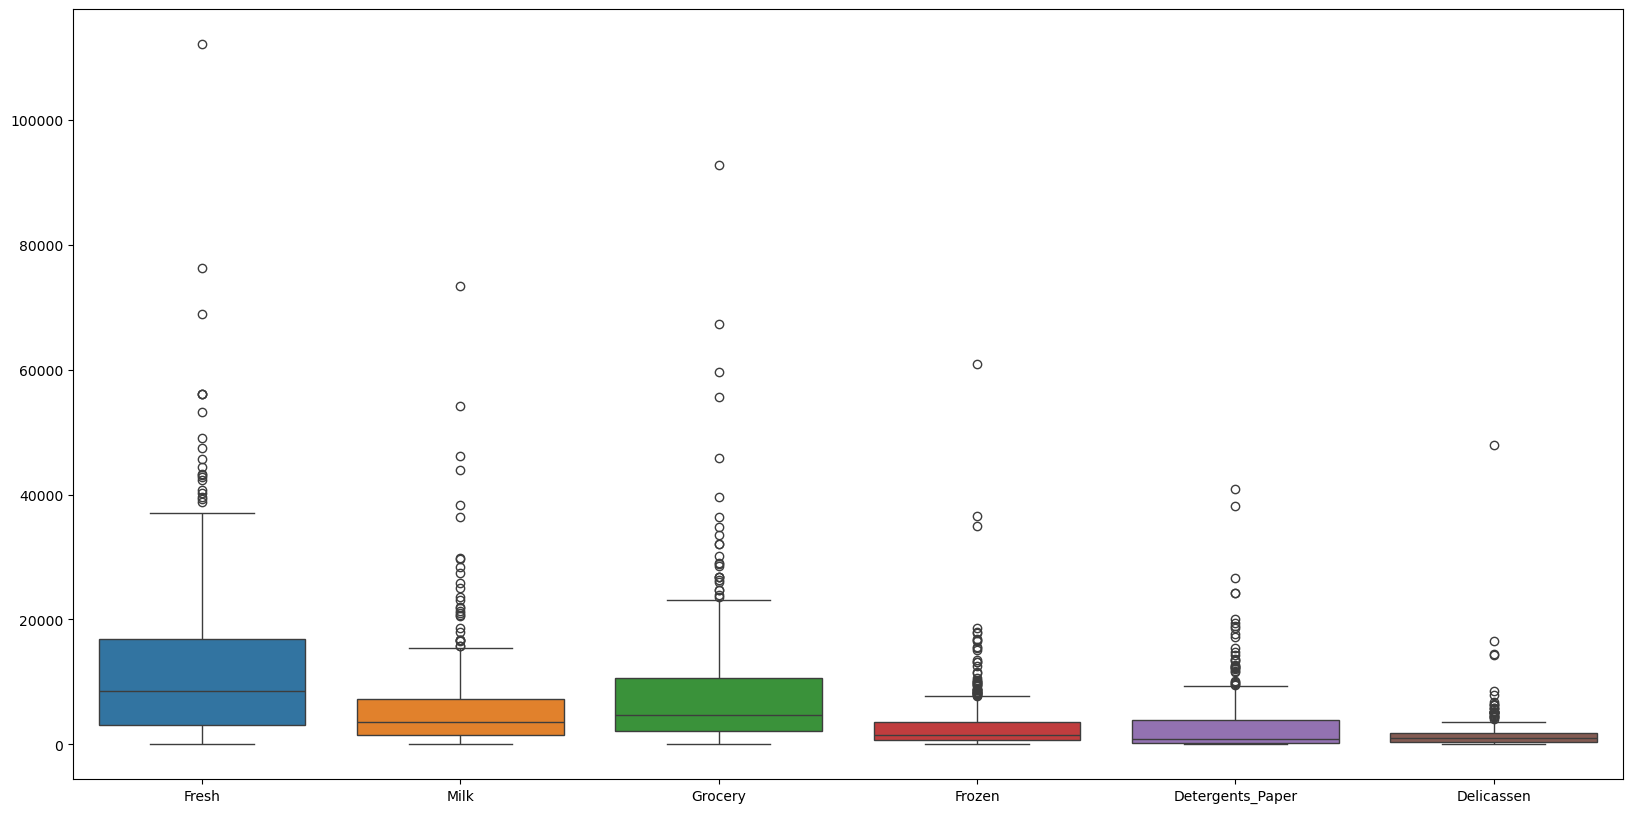

In [17]:
# box blots of each of the columns to see if there are any outliers, excluding Channel and Region
plt.figure(figsize=(20,10))
sns.boxplot(data=data.drop(['Channel', 'Region'], axis=1))
plt.show()


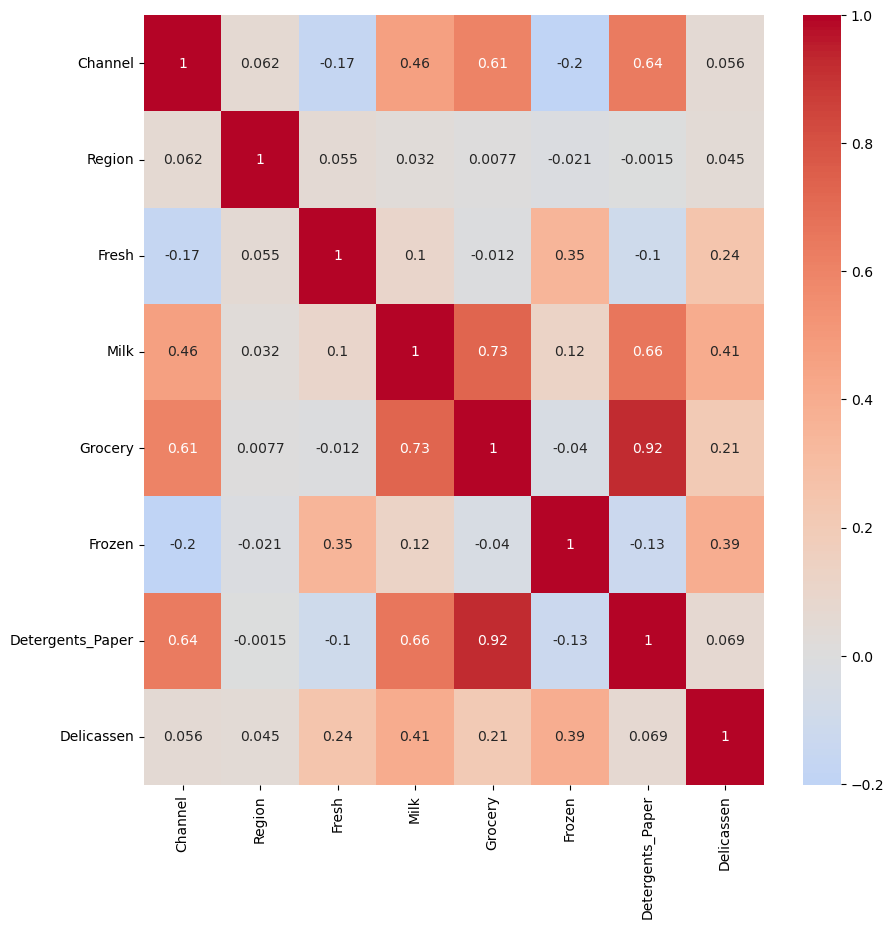

In [21]:
# sns heatplot of the correlation matrix, scale from -1 to 1
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()



looks like detergents_paper is correlated with channel

<Figure size 3000x3000 with 0 Axes>

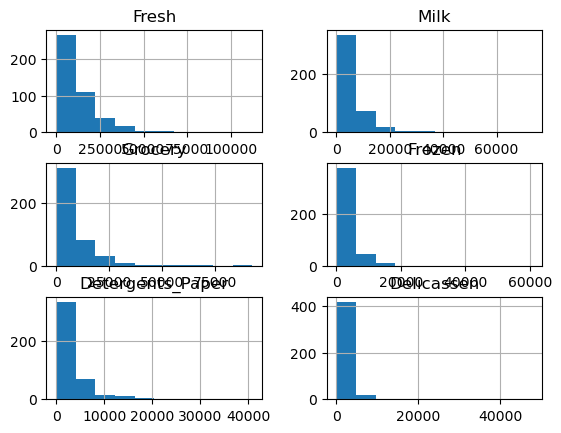

In [10]:
# histogram of the six categories above
plt.figure(figsize=(30,30))
data.drop(['Channel', 'Region'], axis=1).hist()
plt.show()


### Thoughts ###
- Generally higher sales in Fresh - higher average, higher maximum.
- other categories are quite narrow. ranges
- There are quite a few outliers in most categories
- Because this is an unsupervised problem I do not want to delete them. From the volume of them alone and the fact there are many in each category, it may be useful in finding patterns

### Because Fresh is the most varying feature, let's explore channel / region vs Fresh correlation ###

In [16]:
# value counts of channel vs fresh
print(data['Channel'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64


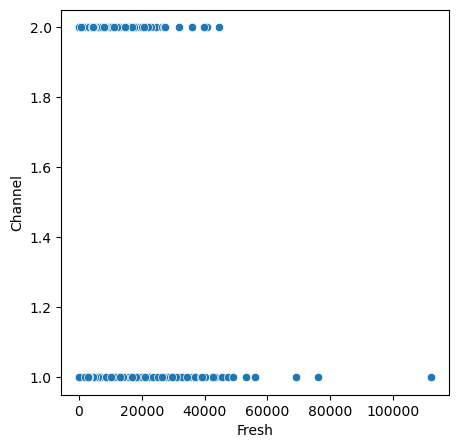

In [12]:
# scatter plot Fresh vs Channel
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='Fresh', y='Channel')
plt.show()


looks like there may be more sales for Fresh in Channel 1.0 but theres twice the number of data points too, so its not certain. Run a corr() score

In [17]:
# corr score on Fresh vs channel
data['Fresh'].corr(data['Channel'])


-0.16917203797978886

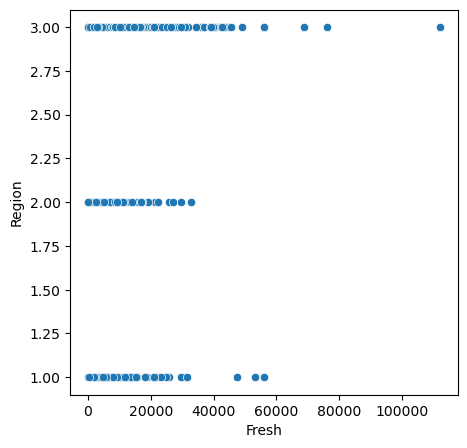

In [13]:
# scatter plot Fresh vs Region
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='Fresh', y='Region')
plt.show()


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [ ]:
# use the elbow method to find the appropriate number of clusters

# it is possible that there's a relationship between region and channel but the corr() score is 0.065 so it's very unlikely
# so i will drop the channel and region columns in two separate models 

# based on the number of channels, i would assume 2 clusters or for regions, 3 clusters
# let's start with 3 clusters for regions

from sklearn.cluster import KMeans

# define the cluster range
cluster_range = range(1, 10)

# drop the channel column
channel_data = data.drop('Channel', axis=1)

In [ ]:
#Define the cluster range and re-calculate the inertia values for the Elbow Method
clusterrange = range(1, 11)

# Re-calculate inertia values for the defined cluster range
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia)

# Plot the Elbow Method graph again with the corrected cluster range
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [22]:
# applying PCA to reduce the dimensionality of the data to 2 dimensions
from sklearn.decomposition import PCA


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.